In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file="KMBL CM Data.xlsx"
cm_data=pd.read_excel(file)


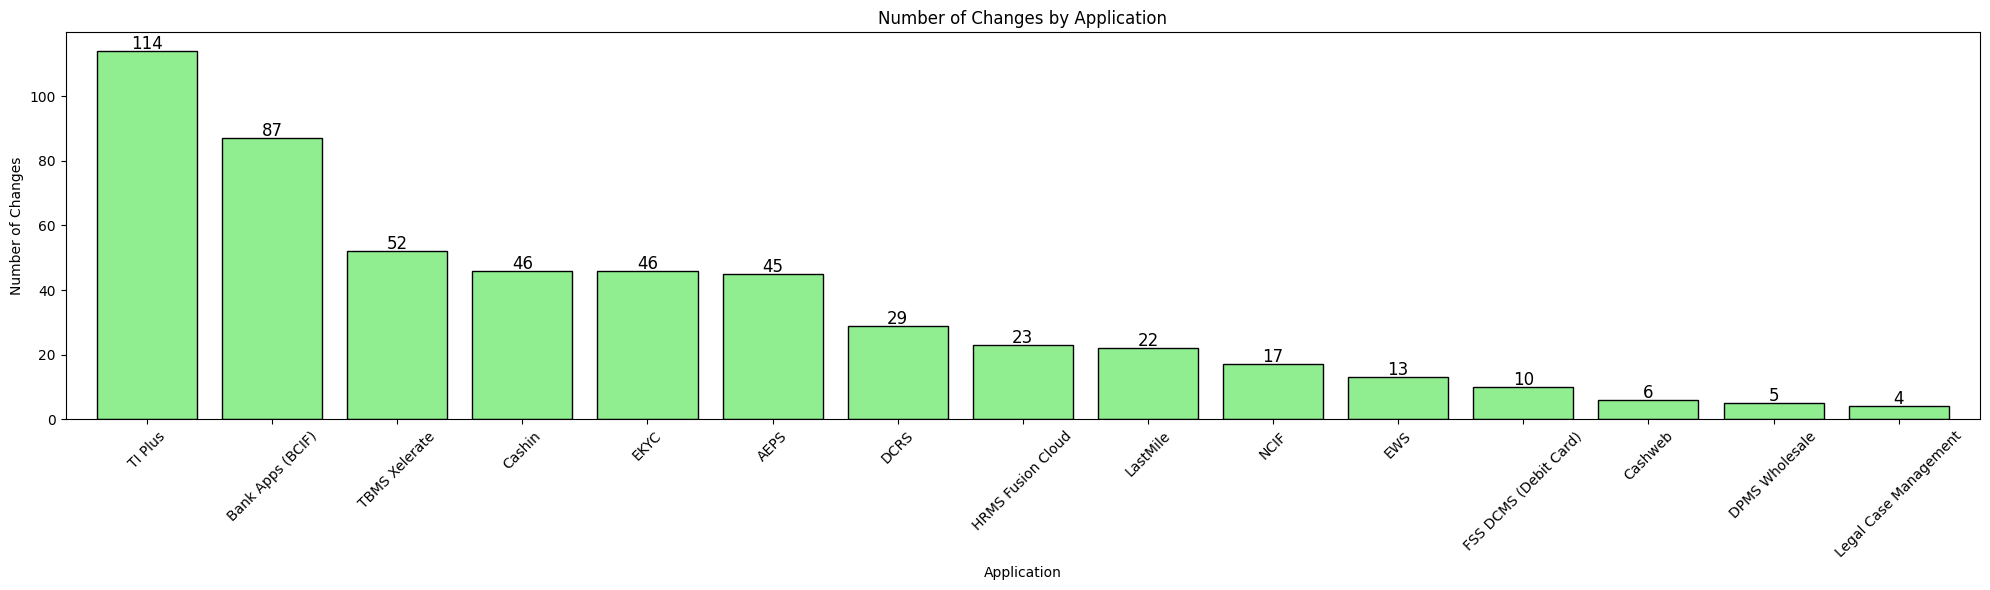

In [2]:
changes_by_app = cm_data.groupby('Application').size()

# Sort by largest to smallest
changes_by_app = changes_by_app.sort_values(ascending=False)

# Plotting the bar chart with light green bars and adjusting bar width
plt.figure(figsize=(20, 6))  # Adjust the figure size if necessary
bars = changes_by_app.plot(kind='bar', color='lightgreen', edgecolor='black', width=0.8)  # Adjust width as needed
plt.title('Number of Changes by Application')
plt.xlabel('Application')
plt.ylabel('Number of Changes')
plt.xticks(rotation=45)
#plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Adding data labels on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='center', 
                 size=12, xytext=(0, 5),
                 textcoords='offset points')

plt.show()

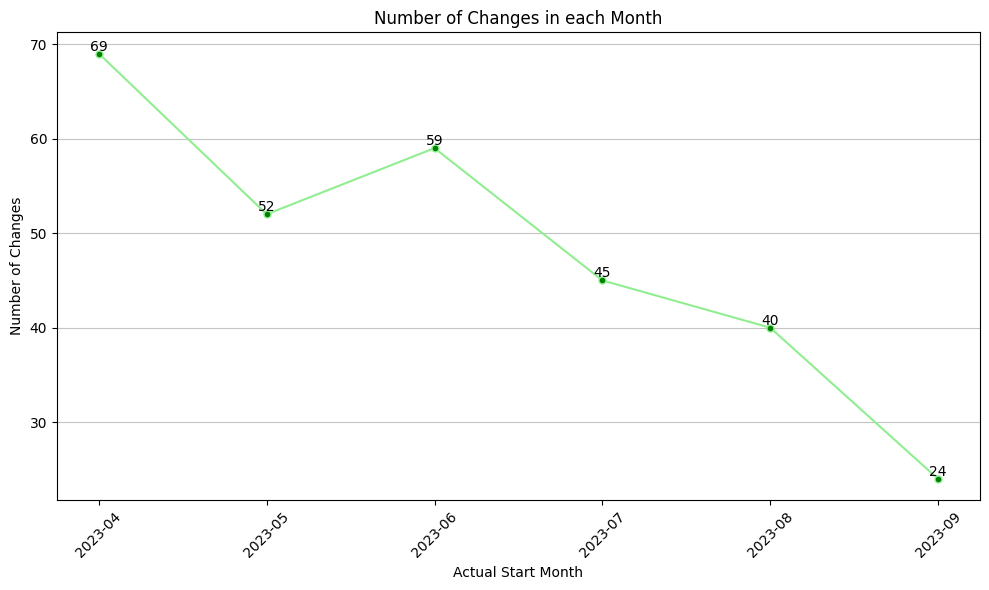

In [3]:
cm_data['Actual Start Date'] = pd.to_datetime(cm_data['Actual Start Date'])

# Extract month and year from 'Actual Start Date'
cm_data['Actual Start Month'] = cm_data['Actual Start Date'].dt.strftime('%Y-%m')

# Group by 'Actual Start Month' and count changes
changes_by_month = cm_data.groupby('Actual Start Month').size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
changes_by_month.plot(kind='line', marker='.', color='lightgreen', markerfacecolor='g', markersize=10)
for i, count in enumerate(changes_by_month):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Changes in each Month')
plt.xlabel('Actual Start Month')
plt.ylabel('Number of Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


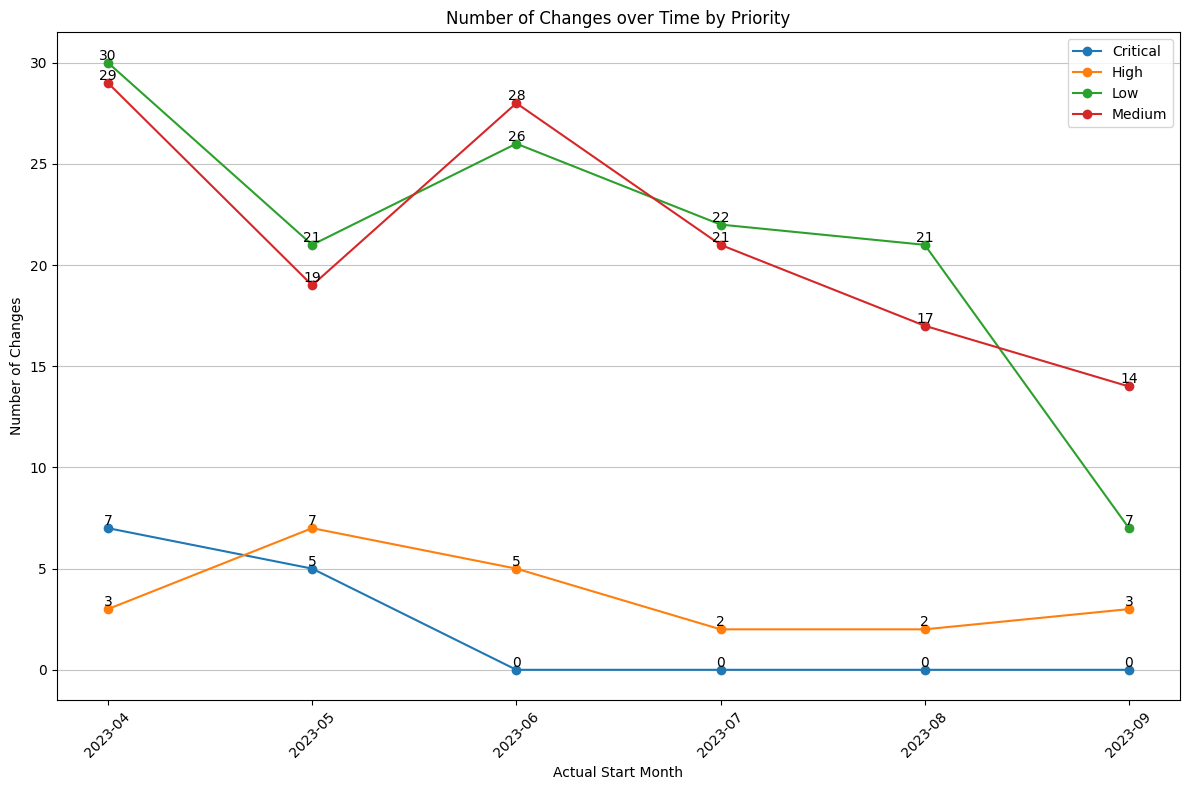

In [4]:
cm_data['Actual Start Date'] = pd.to_datetime(cm_data['Actual Start Date'])

# Extract month and year from 'Actual Start Date'
cm_data['Actual Start Month'] = cm_data['Actual Start Date'].dt.strftime('%Y-%m')

# Group by 'Actual Start Month' and 'Priority' and count changes
changes_by_month_priority = cm_data.groupby(['Actual Start Month', 'Priority']).size().unstack(fill_value=0)

# Plotting the line chart for each priority
plt.figure(figsize=(12, 8))

# Plotting each priority as a separate line
for priority in changes_by_month_priority.columns:
    plt.plot(changes_by_month_priority.index, changes_by_month_priority[priority], marker='o', linestyle='-')

    # Annotate each point with its count value
    for i, count in enumerate(changes_by_month_priority[priority]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Changes over Time by Priority')
plt.xlabel('Actual Start Month')
plt.ylabel('Number of Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.legend(changes_by_month_priority.columns)
plt.tight_layout()
plt.show()


In [5]:
unique_apps = cm_data['Application'].unique()
print(unique_apps)

['Bank Apps (BCIF)' 'TI Plus' 'AEPS' 'FSS DCMS (Debit Card)' 'LastMile'
 'DCRS' 'Legal Case Management' 'NCIF' 'EKYC' 'HRMS Fusion Cloud'
 'DPMS Wholesale' 'EWS' 'TBMS Xelerate' 'Cashin' 'Cashweb']


C:\Users\Rishi.c\AppData\Local\Temp\ipykernel_20212\80493605.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


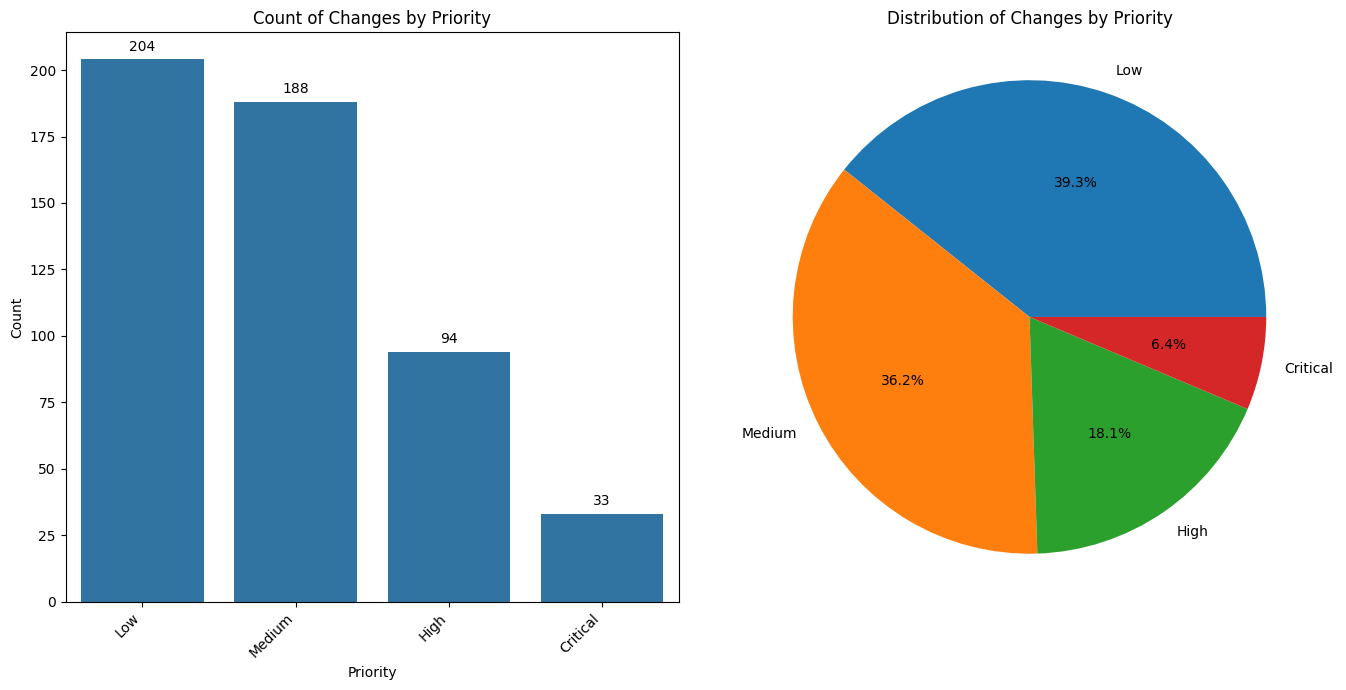

In [6]:

# Assuming 'Priority' column contains priority levels
# Let's first check the unique values and their counts
priority_counts = cm_data['Priority'].value_counts()
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotting histogram with data labels using seaborn and matplotlib
sns.countplot(data=cm_data, x='Priority', order=priority_counts.index, ax=ax1)
ax1.set_title('Count of Changes by Priority')
ax1.set_xlabel('Priority')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Add data labels to the histogram bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

# Plotting pie chart on the second subplot
ax2.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%')
ax2.set_title('Distribution of Changes by Priority')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and show plot
plt.tight_layout()
plt.show()


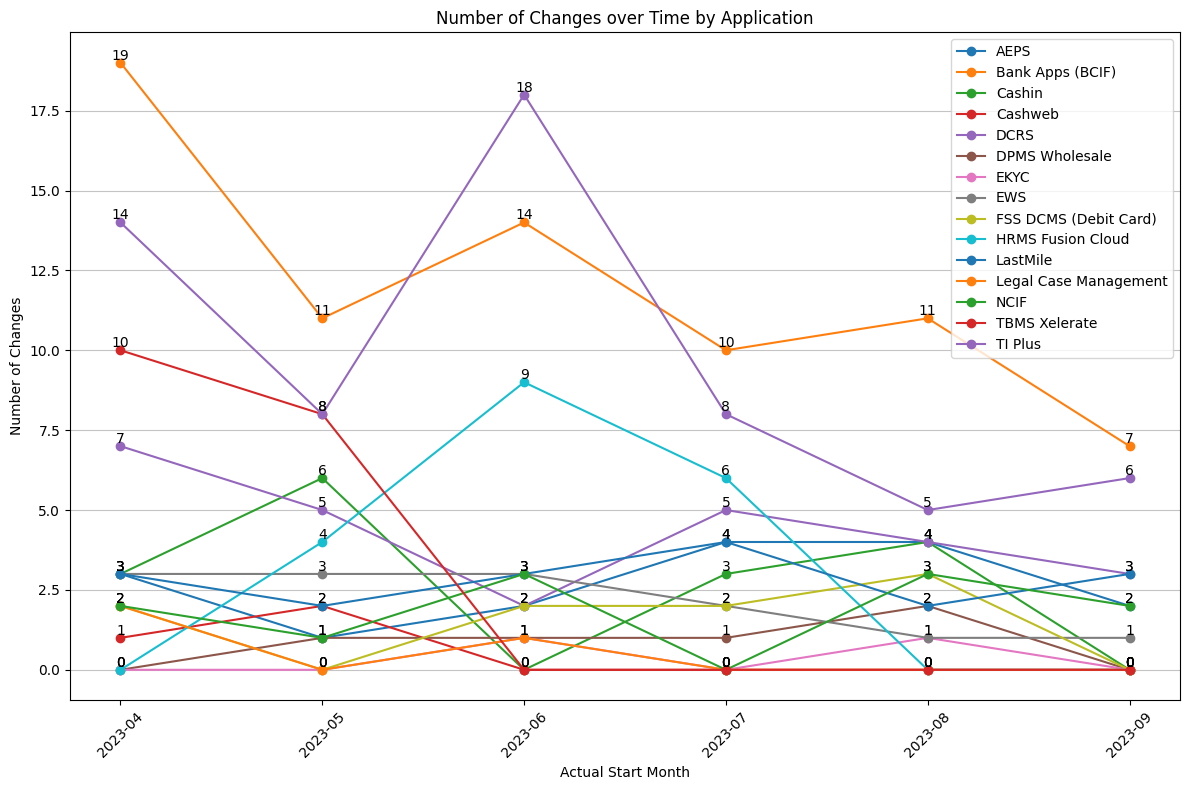

In [7]:
cm_data['Actual Start Date'] = pd.to_datetime(cm_data['Actual Start Date'])

# Extract month and year from 'Actual Start Date'
cm_data['Actual Start Month'] = cm_data['Actual Start Date'].dt.strftime('%Y-%m')

# Group by 'Actual Start Month' and 'Application' and count changes
changes_by_month_app = cm_data.groupby(['Actual Start Month', 'Application']).size().unstack(fill_value=0)

# Plotting the line chart for each application
plt.figure(figsize=(12, 8))

# Plotting each application as a separate line
for application in changes_by_month_app.columns:
    plt.plot(changes_by_month_app.index, changes_by_month_app[application], marker='o', linestyle='-')

    # Annotate each point with its count value
    for i, count in enumerate(changes_by_month_app[application]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Changes over Time by Application')
plt.xlabel('Actual Start Month')
plt.ylabel('Number of Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.legend(changes_by_month_app.columns)
plt.tight_layout()
plt.show()


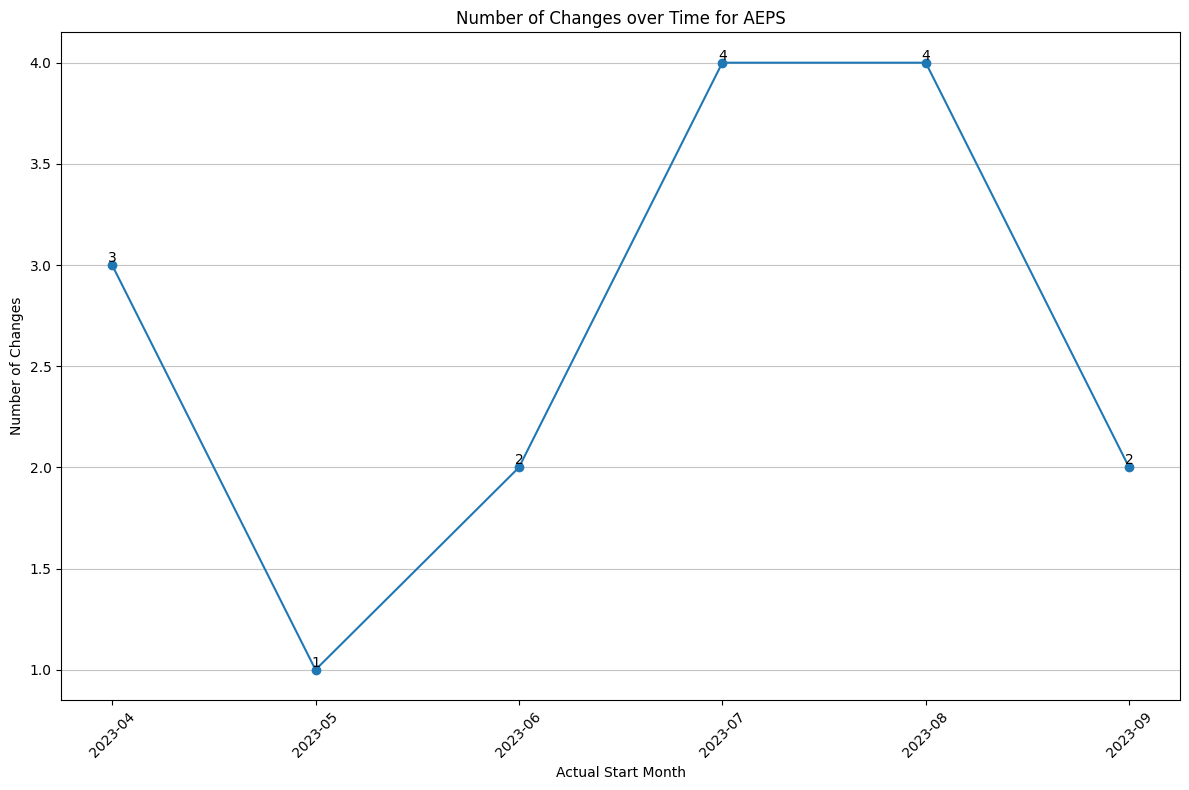

In [8]:
cm_data['Actual Start Date'] = pd.to_datetime(cm_data['Actual Start Date'])

# Extract month and year from 'Actual Start Date'
cm_data['Actual Start Month'] = cm_data['Actual Start Date'].dt.strftime('%Y-%m')

# Group by 'Actual Start Month' and 'Application' and count changes
changes_by_month_app = cm_data.groupby(['Actual Start Month', 'Application']).size().unstack(fill_value=0)

# Prompt user for input
app_to_plot = input("Enter the application name to plot ").strip()

# Check if the entered application exists in the data
if app_to_plot in changes_by_month_app.columns:
    # Plotting the line chart for the specified application
    plt.figure(figsize=(12, 8))
    plt.plot(changes_by_month_app.index, changes_by_month_app[app_to_plot], marker='o', linestyle='-')

    # Annotate each point with its count value
    for i, count in enumerate(changes_by_month_app[app_to_plot]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Number of Changes over Time for {app_to_plot}')
    plt.xlabel('Actual Start Month')
    plt.ylabel('Number of Changes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


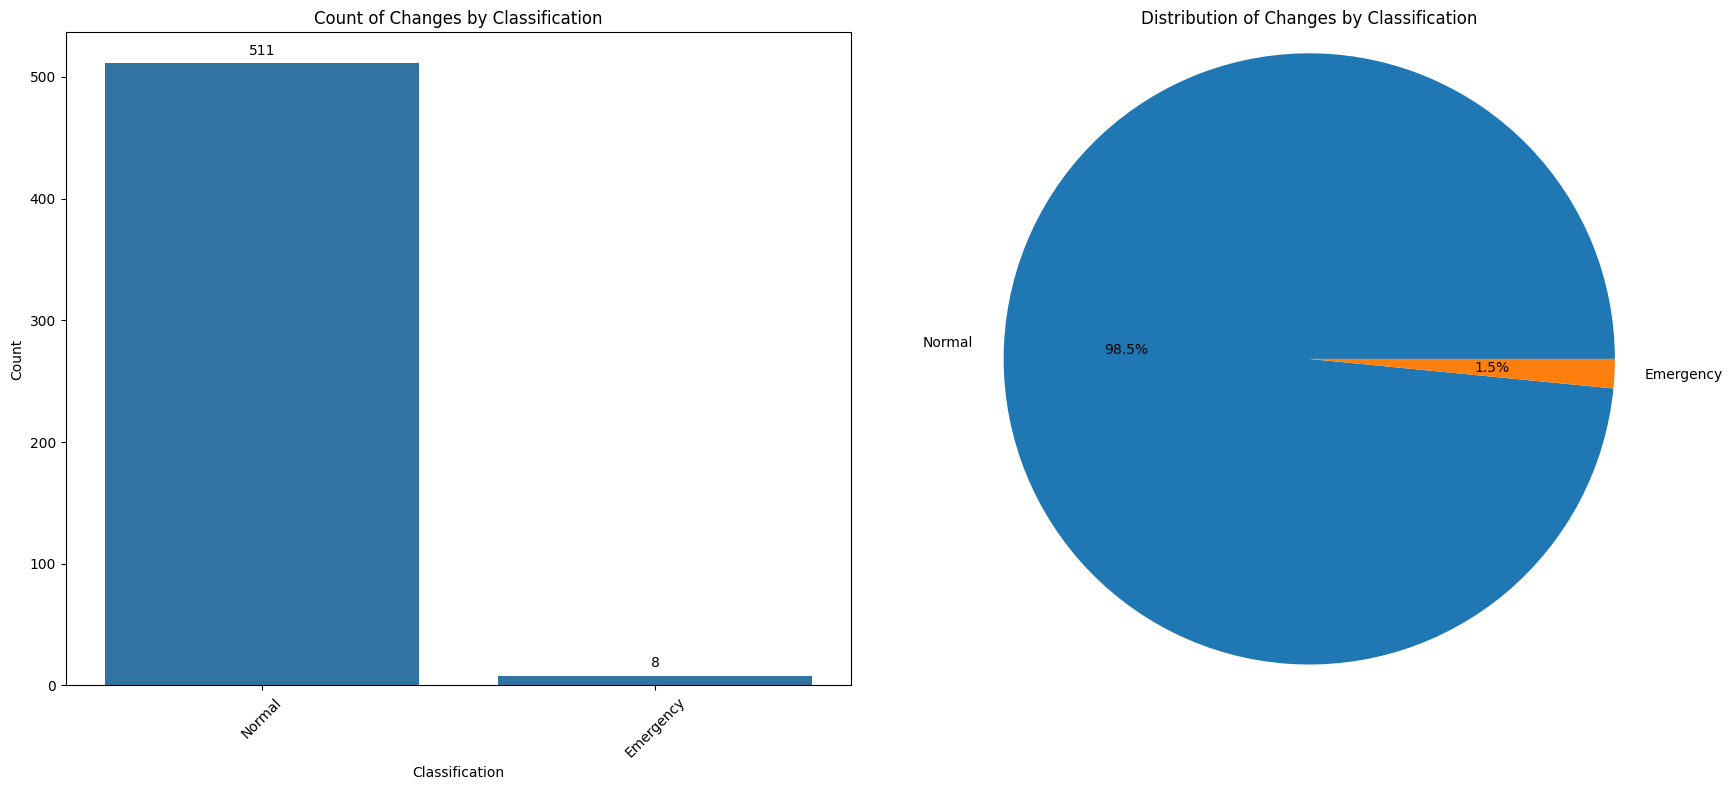

In [9]:
classification_counts = cm_data['Classification'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot
sns_barplot = sns.countplot(data=cm_data, x='Classification', order=classification_counts.index, ax=axs[0])
axs[0].set_title('Count of Changes by Classification')
axs[0].set_xlabel('Classification')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Add data labels on bar plot
for p in sns_barplot.patches:
    sns_barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')

# Pie Chart
axs[1].pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%')
axs[1].set_title('Distribution of Changes by Classification')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


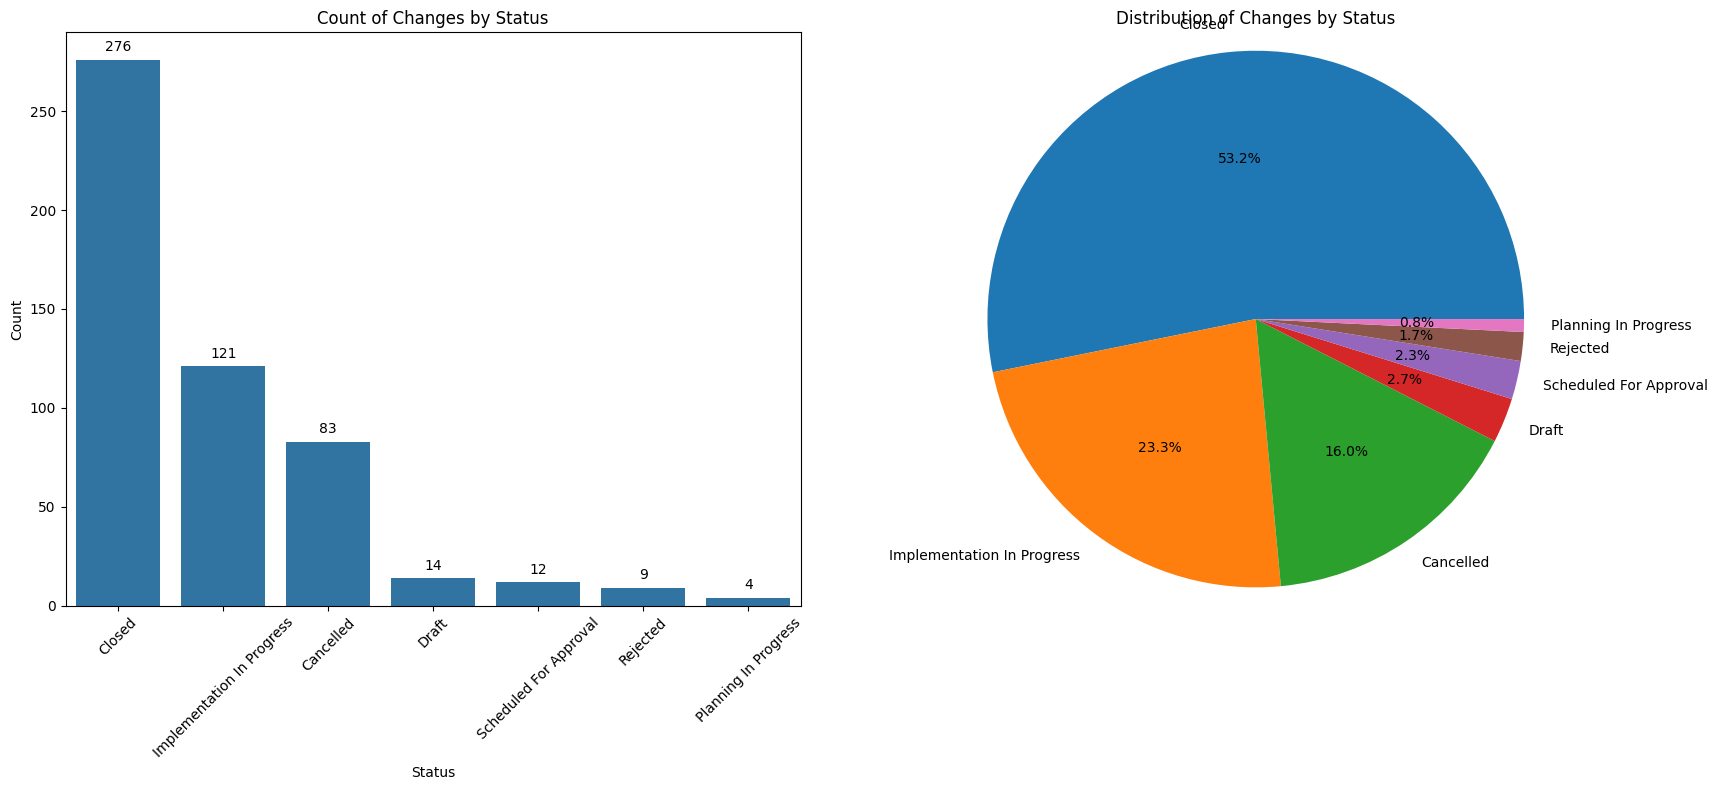

In [10]:
status_counts = cm_data['Status'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot for Status
sns_barplot_status = sns.countplot(data=cm_data, x='Status', order=status_counts.index, ax=axs[0])
axs[0].set_title('Count of Changes by Status')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Add data labels on bar plot for Status
for p in sns_barplot_status.patches:
    sns_barplot_status.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='center', 
                                xytext=(0, 9), 
                                textcoords='offset points')

# Pie Chart for Status
axs[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=0)
axs[1].set_title('Distribution of Changes by Status')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()

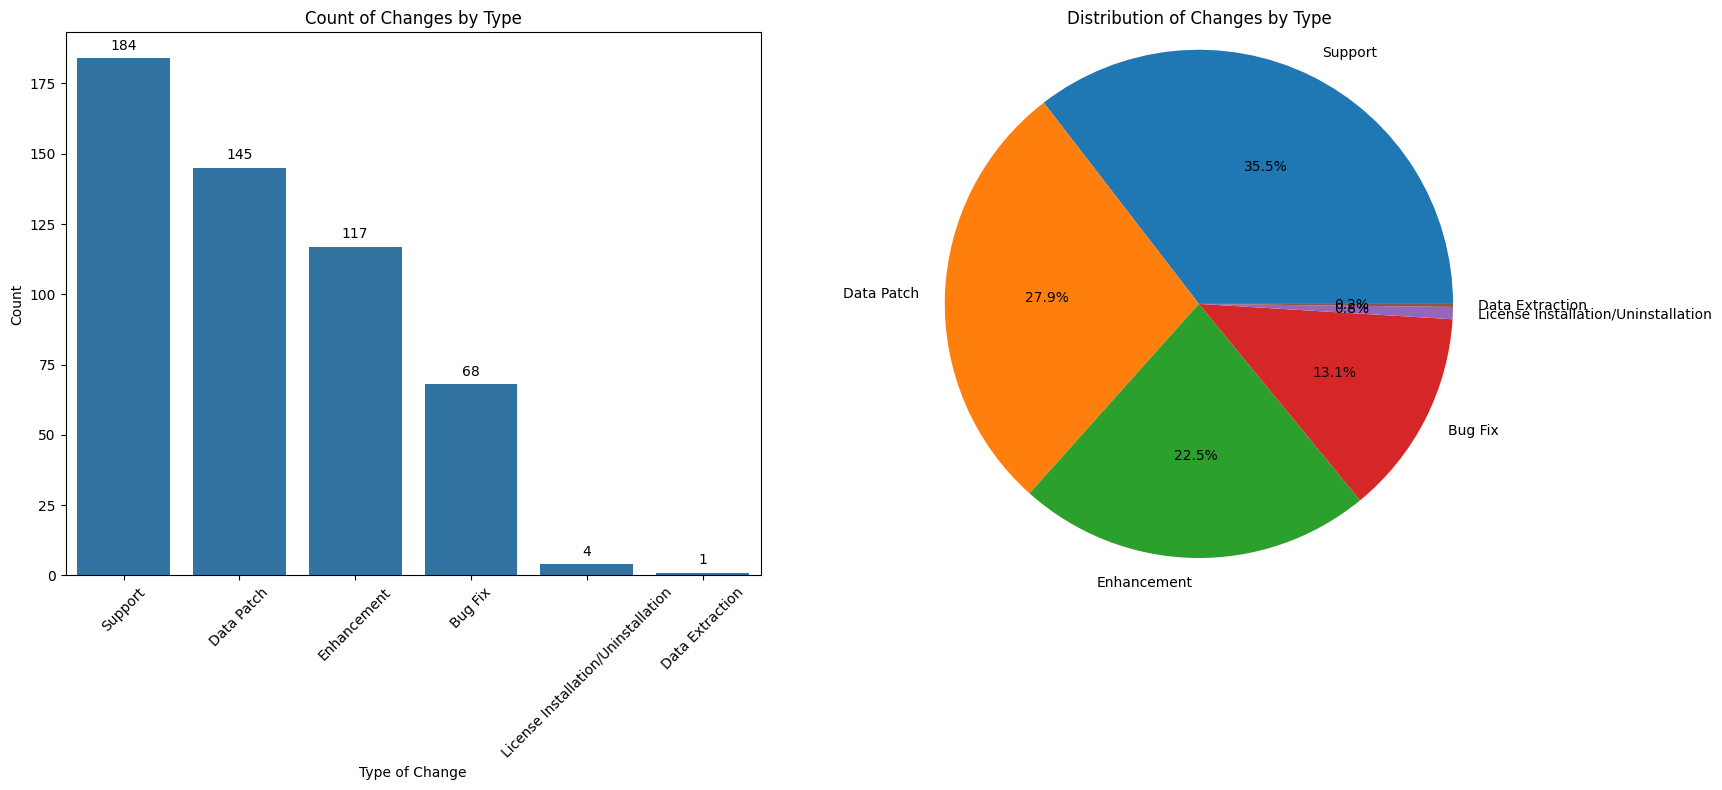

In [11]:
status_counts = cm_data['Type of Change'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot for Status
sns_barplot_status = sns.countplot(data=cm_data, x='Type of Change', order=status_counts.index, ax=axs[0])
axs[0].set_title('Count of Changes by Type')
axs[0].set_xlabel('Type of Change')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Add data labels on bar plot for Status
for p in sns_barplot_status.patches:
    sns_barplot_status.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='center', 
                                xytext=(0, 9), 
                                textcoords='offset points')

# Pie Chart for Status
axs[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=0)
axs[1].set_title('Distribution of Changes by Type')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
sample_size = int(len(cm_data) * 0.25)

# Stratify the data by priority and calculate the sample size for each stratum
stratified_sample = cm_data.groupby('Priority', group_keys=False).apply(lambda x: x.sample(frac=0.25))
stratified_sample.to_csv("Generated Sample.csv")
print("Sample written to Generated Sample.xlsx")

Sample written to Generated Sample.xlsx


C:\Users\Rishi.c\AppData\Local\Temp\ipykernel_20212\328954974.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = cm_data.groupby('Priority', group_keys=False).apply(lambda x: x.sample(frac=0.25))
